In [3]:
! pip install pandas scikit-learn umap-learn hdbscan matplotlib


   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   --------------------------------------- 726.2/726.2 kB 15.0 MB/s eta 0:00:00


In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import umap
import hdbscan
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


In [26]:
# Load your data
df = pd.read_csv('dimension_reduction.csv')
df.columns

Index(['substance', 'GCMS breakdown product', 'active agent', 'adulterant',
       'amphetamine & derivatives', 'anabolic', 'analgesic', 'anesthetic',
       'anti-anxiety', 'anti-tussive',
       ...
       '2,2,6,6-tetramethyl-4-piperidinol', 'glycerin', 'MDMB-4en-PINACA',
       'diacetamate', 'cannabidiol', 'molecular_weight', 'XLogP',
       'HBondDonorCount', 'HBondAcceptorCount', 'tpsa'],
      dtype='object', length=172)

In [27]:
numerical_cols  = list(df.loc[:, 'fentanyl_y':'bis sebacate'].columns)
binary_cols = list(df.loc[:, 'adulterant':'weak opioid'].columns)  # already 0/1

C:\Users\panth\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


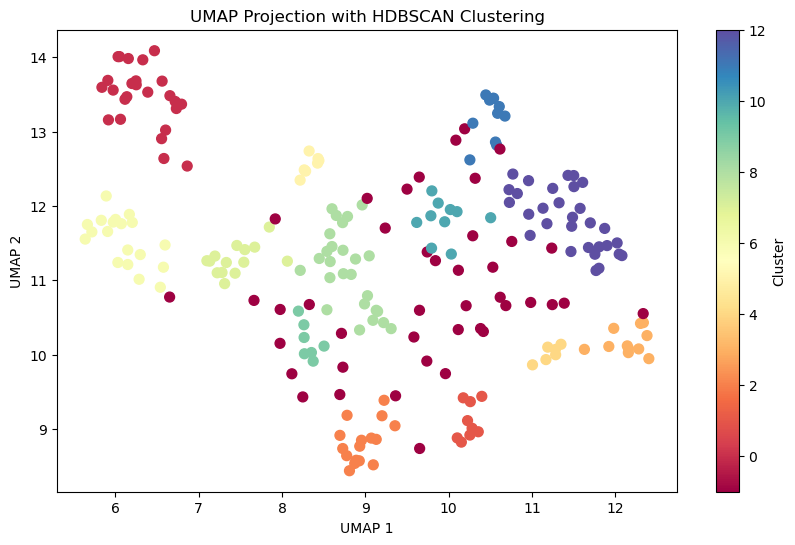

In [50]:
# Preprocess
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('bin', 'passthrough', binary_cols)
])

X_processed = preprocessor.fit_transform(df)

# UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_processed)

# HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels = clusterer.fit_predict(X_umap)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='Spectral', s=50)
plt.title('UMAP Projection with HDBSCAN Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster')
plt.show()

In [51]:
score = silhouette_score(X_umap, labels)
print(f"Silhouette Score: {score:.3f}")

db_score = davies_bouldin_score(X_umap, labels)
print(f"Davies-Bouldin Index: {db_score:.3f}")

ch_score = calinski_harabasz_score(X_umap, labels)
print(f"Calinski-Harabasz Score: {ch_score:.3f}")

Silhouette Score: 0.350
Davies-Bouldin Index: 1.012
Calinski-Harabasz Score: 144.075


C:\Users\panth\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\panth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


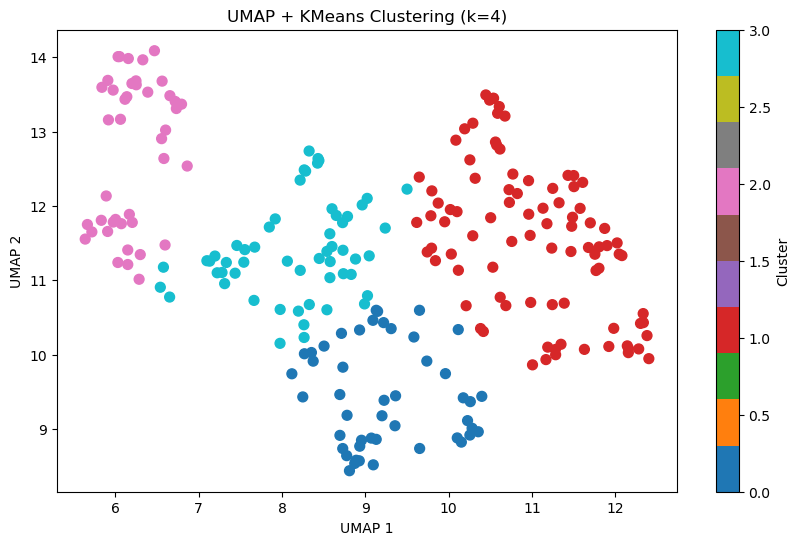

In [52]:
# Dimensionality reduction (optional but helpful for visualization/clustering)
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_processed)

# Apply KMeans clustering
n_clusters = 4 # you can tune this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_umap)

# Plot UMAP projection with KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=50)
plt.title(f'UMAP + KMeans Clustering (k={n_clusters})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster')
plt.show()

In [57]:
X_umap

array([[ 7.194834 , 11.325634 ],
       [ 6.651217 , 10.7738495],
       [11.243531 , 10.671919 ],
       [ 8.4467745, 11.293021 ],
       [ 6.8621473, 12.536717 ],
       [ 8.57486  , 11.034808 ],
       [ 8.2686405, 10.0107765],
       [ 8.118229 ,  9.741336 ],
       [ 6.596556 , 11.474494 ],
       [ 7.5535183, 11.41217  ],
       [ 8.327506 , 10.673289 ],
       [ 7.847467 , 11.71554  ],
       [ 6.1680236, 11.886234 ],
       [ 6.3889027, 13.531077 ],
       [ 6.32921  , 13.966102 ],
       [ 6.061481 , 13.1658535],
       [ 5.973397 , 13.558603 ],
       [ 5.8386273, 13.596278 ],
       [ 6.602906 , 13.020859 ],
       [ 6.071426 , 11.7608595],
       [ 6.155525 , 13.983392 ],
       [ 6.032572 , 14.008727 ],
       [ 6.04954  , 14.009453 ],
       [ 5.831057 , 11.806594 ],
       [ 8.217255 , 12.347217 ],
       [ 6.5610247, 13.679348 ],
       [ 8.26507  , 10.229833 ],
       [ 8.196892 , 10.58437  ],
       [ 8.872789 ,  8.535578 ],
       [ 8.064073 , 11.256688 ],
       [ 6

In [53]:
score = silhouette_score(X_umap, labels)
print(f"Silhouette Score: {score:.3f}")

db_score = davies_bouldin_score(X_umap, labels)
print(f"Davies-Bouldin Index: {db_score:.3f}")

ch_score = calinski_harabasz_score(X_umap, labels)
print(f"Calinski-Harabasz Score: {ch_score:.3f}")

Silhouette Score: 0.423
Davies-Bouldin Index: 0.775
Calinski-Harabasz Score: 274.980


In [61]:
# Keep only numeric columns for summary
numeric_features = numerical_cols + binary_cols

# Group by cluster and summarize
cluster_summary = df.groupby('cluster')[numeric_features].agg(['mean', 'std', 'count'])
cluster_summary


fentanyl_y                        4-ANPP                    \
               mean         std count        mean         std count   
cluster                                                               
0        216.063830  376.336482    47  202.553191  368.313064    47   
1          7.471910   23.031150    89    6.719101   20.722182    89   
2          2.046512    5.883607    43    1.581395    4.510478    43   
3          7.145455   11.301292    55    6.690909   10.675123    55   

           cocaine                  methyl ecgonidine  ... uncommon  \
              mean        std count              mean  ...    count   
cluster                                                ...            
0        58.936170  81.668046    47         10.723404  ...       47   
1         2.123596   6.374345    89          0.202247  ...       89   
2         1.837209   5.200413    43          0.255814  ...       43   
3         2.181818   3.073729    55          0.254545  ...       55   

        up-and-down                     upper                 weak opioid  \
               mean       std count      mean       std count        mean   
cluster                                                                     
0          0.021277  0.145865    47  0.106383  0.311661    47    0.042553   
1          0.000000  0.000000    89  0.011236  0.106000    89    0.011236   
2          0.116279  0.324353    43  0.441860  0.502486    43    0.000000   
3          0.000000  0.000000    55  0.072727  0.262082    55    0.127273   

                        
             std count  
cluster                 
0        0.20403    47  
1        0.10600    89  
2        0.00000    43  
3        0.33635    55  

[4 rows x 453 columns]

In [60]:
df.groupby('cluster')['substance'].value_counts(normalize=True)


cluster  substance                           
0        1-phenethyl-4-hydroxypiperidine         0.021277
         1-phenethyl-4-propionyloxypiperidine    0.021277
         4-ANPP                                  0.021277
         6-monoacetylmorphine                    0.021277
         N-Pyrrolidino-Protonitazene             0.021277
                                                   ...   
3        t-Boc Norfentanyl                       0.018182
         theobromine                             0.018182
         tianeptine                              0.018182
         tianeptine metabolite                   0.018182
         vitamin E acetate                       0.018182
Name: proportion, Length: 234, dtype: float64

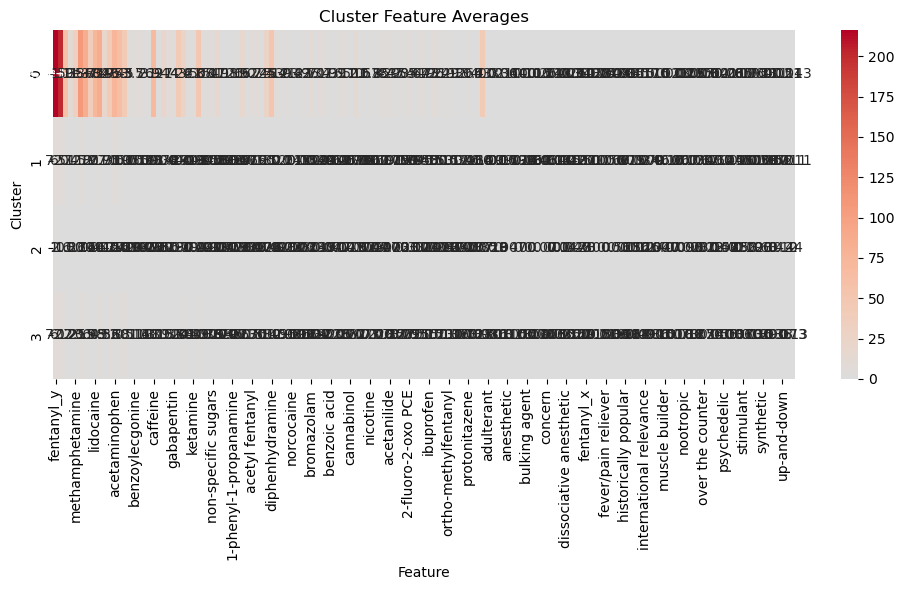

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute mean of features per cluster
cluster_means = df.groupby('cluster')[numerical_cols + binary_cols].mean()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', center=0)
plt.title("Cluster Feature Averages")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

In [64]:
# Z-score the cluster means across clusters (by column)
scaler = StandardScaler()
z_scored = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    columns=cluster_means.columns,
    index=cluster_means.index
)

# Get top 5 absolute features per cluster
top_features_per_cluster = {}

for cluster_id, row in z_scored.iterrows():
    top_features = row.abs().sort_values(ascending=False).head(10).index.tolist()
    top_features_per_cluster[cluster_id] = top_features

# Show the result
for cid, features in top_features_per_cluster.items():
    print(f"🔹 Cluster {cid} Top Features: {features}")

🔹 Cluster 0 Top Features: ['methyl ecgonidine', 'ecgonine methylester', 'cocaine', 'norcocaine', 'levamisole', 'tropacocaine', 'quinine', 'diphenhydramine', 'methamphetamine', 'dimethyl sulfone']
🔹 Cluster 1 Top Features: ['potent benzodiazepine', 'synthetic cannabinoid', 'anabolic', 'muscle builder', 'benzodiazepine', 'steroid', 'anti-anxiety', 'hormone', 'muscle relaxant', 'likely pharmaceutical origin']
🔹 Cluster 2 Top Features: ['hallucinogen', 'psychedelic', 'substituted cathinone', 'amphetamine & derivatives', 'up-and-down', 'upper', 'nootropic', 'stimulant', 'ketamine impurity', 'historically popular']
🔹 Cluster 3 Top Features: ['impurity', 'cannabinoid', 'weak opioid', 'methamphetamine impurity', 'anesthetic', 'heroin impurity', 'plant grown', 'contaminant', 'anti-tussive', 'synthetic']


C:\Users\panth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


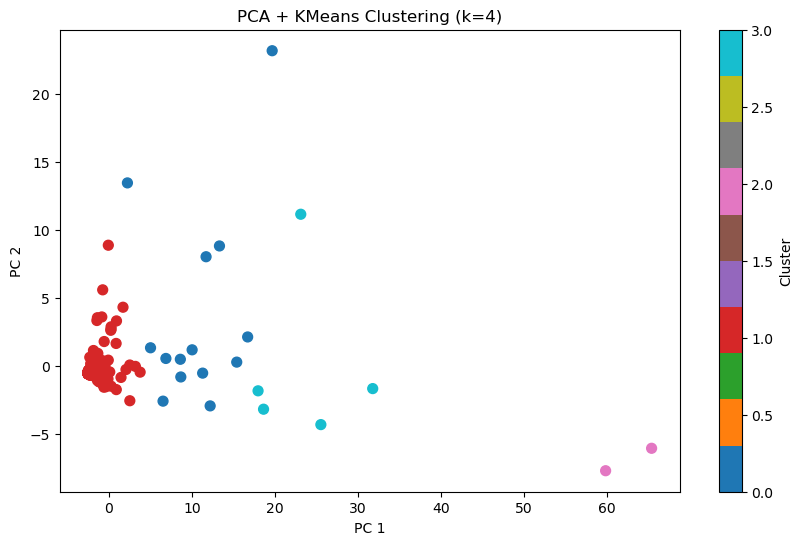

In [48]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# KMeans clustering
n_clusters = 4  # adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot PCA results with cluster assignments
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.title(f'PCA + KMeans Clustering (k={n_clusters})')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster')
plt.show()

In [49]:
score = silhouette_score(X_umap, labels)
print(f"Silhouette Score: {score:.3f}")

db_score = davies_bouldin_score(X_umap, labels)
print(f"Davies-Bouldin Index: {db_score:.3f}")

ch_score = calinski_harabasz_score(X_umap, labels)
print(f"Calinski-Harabasz Score: {ch_score:.3f}")

Silhouette Score: 0.024
Davies-Bouldin Index: 1.722
Calinski-Harabasz Score: 8.598
